# Overview


We will kick things off with an **in class** lecture on few more administrative things
* Groups
* The large-scale structure of the class
   * Networks and NLP
   * Exercises versus Assignments
   * The final project
* Other stuff (when lectures will be posted, etc)

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

In [1]:
import networkx as nx

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

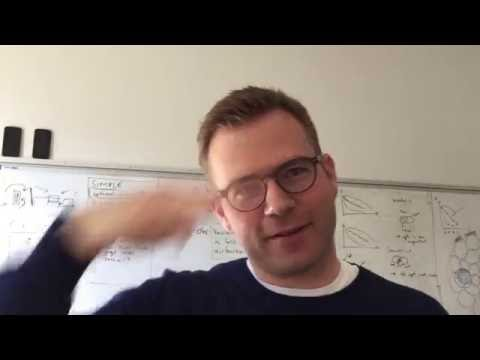

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) 
# Or use https://www.youtube.com/watch?v=MMziC5xktHs if the video isn't displaying

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can find the whole 
> thing for free [**here**](http://networksciencebook.com). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.

<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


one example where each node has many connections, yet the network is very sparse is a social network like facebook, where each person might have 1000+ friends yet with 1 billion users this network is very sparse.

Another sparse network could be actors in movies. While a single actor who has done a lot of work like Morgan Freeman might be in over 100 different movies, his adjecency matrix is relatively small compared to the total amount of movies out there.

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

* königsberg problem
(a) is possible since there are only two nodes with an uneven amount of edges
(b) is not possible as all 4 nodes have 3 edges
(c) is possible because there are no nodes with an uneven number of edges, meaning that you can visit all edges.
(d) is possible because there is only a single node with an uneven amount of edges, so you jsut have to start in that node

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
average clustering: 0.6388888888888888
[[4 2 2 1 0 1]
 [2 3 1 1 0 2]
 [2 1 3 2 0 1]
 [1 1 2 2 0 1]
 [0 0 0 0 0 0]
 [1 2 1 1 0 2]]
[[6 7 7 6 0 6]
 [7 4 7 5 0 3]
 [7 7 4 3 0 5]
 [6 5 3 2 0 3]
 [0 0 0 0 0 0]
 [6 3 5 3 0 2]]


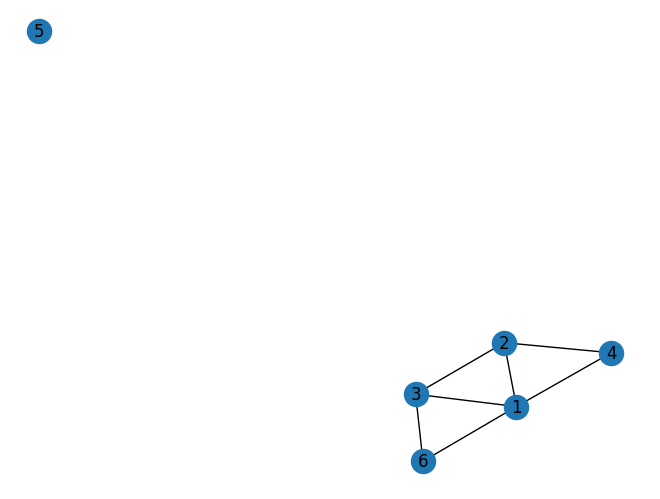

In [12]:
import networkx as nx
import numpy as np

grapha = nx.Graph()
grapha.add_nodes_from([1,2,3,4,5,6])
grapha.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,4),(1,6),(3,6)])

nx.draw(grapha, with_labels=True)

adjacency_matrix = nx.adjacency_matrix(grapha).todense()
print(adjacency_matrix)

link_list = list(grapha.edges())
print(link_list)

print("average clustering:", nx.average_clustering(grapha))

step_neighbors = adjacency_matrix.T@adjacency_matrix
print(step_neighbors)  # counts number of paths of length
A3 = np.linalg.matrix_power(adjacency_matrix, 3)
print(A3)

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

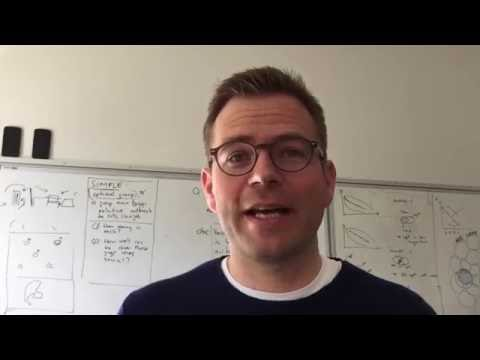

In [5]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) 
# https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>
**And don't just use the built-in binning functions. That misses the point. Instead follow the exercise carefully**. 

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

(array([  15.,   60.,  262.,  798., 1254., 1351.,  833.,  326.,   88.,
          13.]),
 array([1.55305667, 1.64122861, 1.72940056, 1.8175725 , 1.90574444,
        1.99391639, 2.08208833, 2.17026028, 2.25843222, 2.34660416,
        2.43477611]),
 <BarContainer object of 10 artists>)

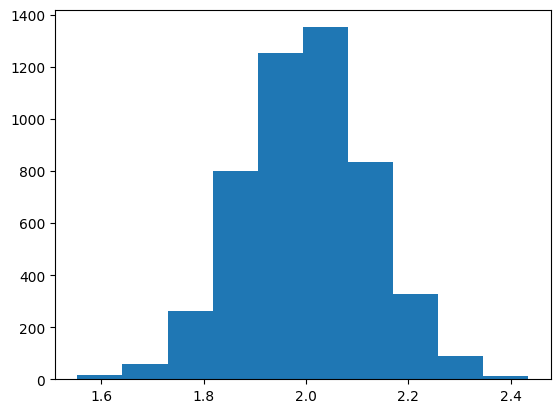

In [26]:
import random
import matplotlib.pyplot as plt
import numpy as np


nums = [random.gauss(2, 0.125) for _ in range(5000)]


hist = np.histogram(nums, bins=10)






plt.hist(nums, bins=10)

# why is there a difference between number of counts and the number of bins? ans: because the bins are ranges, and the counts are the number of values in each range




min: 1
max: 24


(array([  2.,   6.,  32.,  74., 185., 339., 449., 516., 610., 638., 573.,
        472., 406., 251., 187., 115.,  62.,  41.,  26.,   6.,   5.,   2.,
          1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <BarContainer object of 24 artists>)

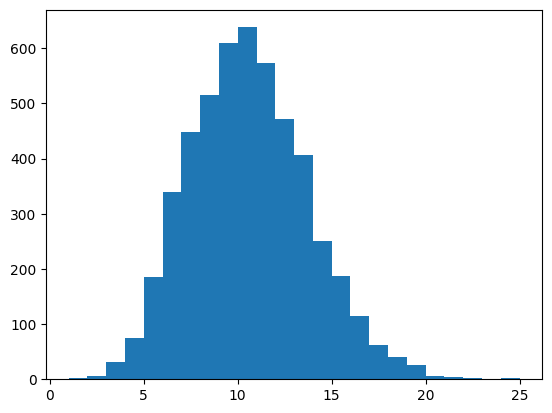

In [38]:
# binning integers

fisk = np.random.poisson(10, 5000)

print("min:", min(fisk))
print("max:", max(fisk))

# bins where each integer value gets its own bin
bin_edges = np.arange(min(fisk), max(fisk) + 2) 

hist2 = np.histogram(fisk, bins=bin_edges)

plt.hist(fisk, bins=bin_edges)



(array([  4.,  12.,  31., 103., 179., 326., 449., 589., 643., 611., 556.,
        485., 380., 267., 141., 103.,  62.,  35.,  10.,  10.,   1.,   3.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <BarContainer object of 22 artists>)

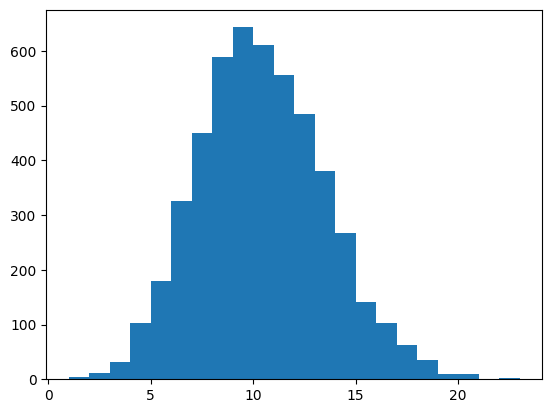

In [40]:
# erdos-renyi network

# k = p(N-1) = 10 = p(5000-1)= p = 10/4999 = 0.0020004
# so p = 0.002

erdos_renyi = nx.erdos_renyi_graph(5000, 0.002)
degrees = [d for n, d in erdos_renyi.degree()]
plt.hist(degrees, bins=22)



# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

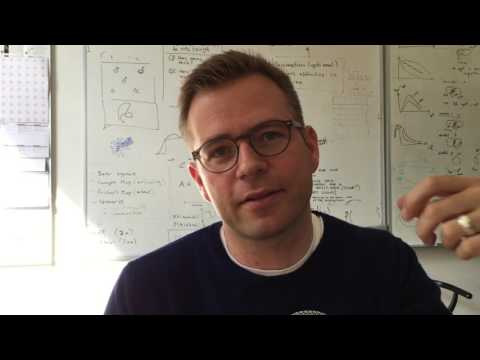

In [4]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) 
# https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

Exercises 

3.1

L = 10^-3*(3000*2999)/2 = 4498.5 number of average total links in the graph with 3000 nodes and a probability of 10^-3 of a link between two nodes

it is a sparse regime



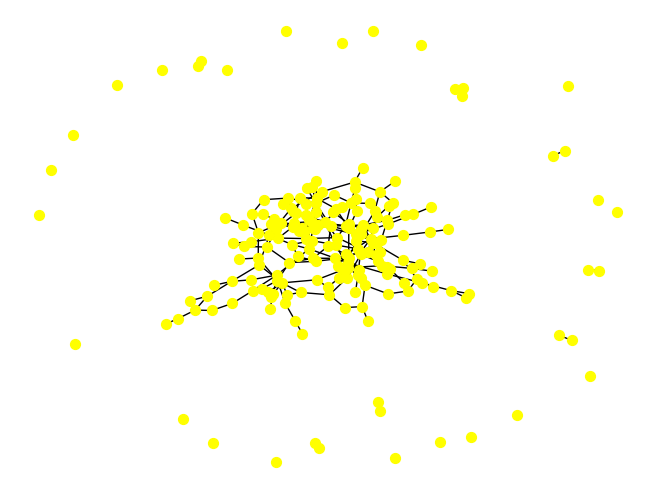

In [51]:
G = nx.erdos_renyi_graph(200,0.01)

nx.draw_spring(G, node_size=50,with_labels=False, node_color='yellow')

163
chosen node: 116
nodes 2 steps away: {116: 0, 85: 1, 31: 2, 47: 2}


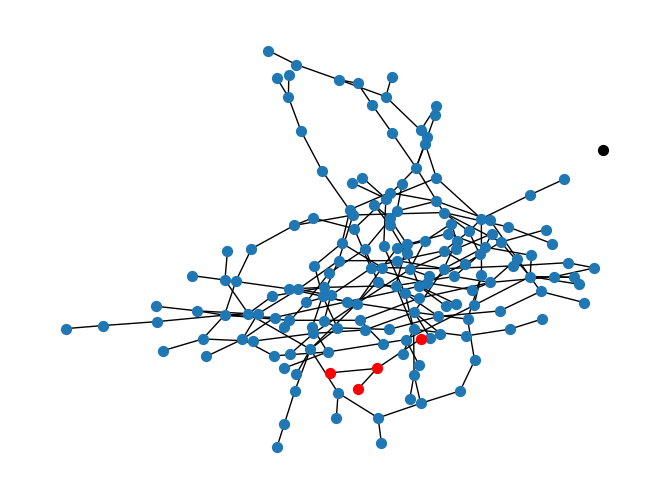

In [70]:
GCC =nx.connected_components(G)


largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy()


print(len(G_largest.nodes()))

# pick a node at random
node = random.choice(list(G_largest.nodes()))
print("chosen node:", node)
nodes_at_distance_2 = nx.single_source_shortest_path_length(G_largest, node, cutoff=2)

print("nodes 2 steps away:", nodes_at_distance_2)

G_largest.nodes[node]["style"] = "#000000"
#nx.draw_spring(G_largest, node_size=50,pos=nx.spring_layout(G_largest), node_color=[G_largest.nodes[n].get("style", "#AAAAFF") for n in G_largest.nodes()])
nx.draw(G_largest, node_size=50,pos=nx.spring_layout(G_largest))
nx.draw(G_largest.subgraph(nodes_at_distance_2.keys()), node_size=50,pos=nx.spring_layout(G_largest), node_color='#ff0000')
nx.draw(G_largest.subgraph([node]), node_size=50,pos=nx.spring_layout(G_largest), node_color='#000000')